In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [2]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

print(train_df.shape, test_df.shape)


(1460, 81) (1459, 80)


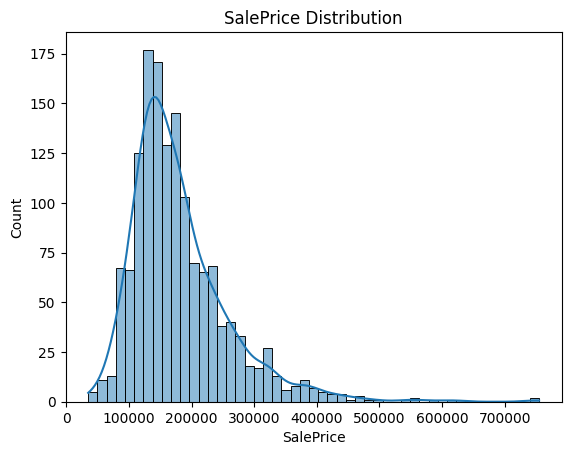

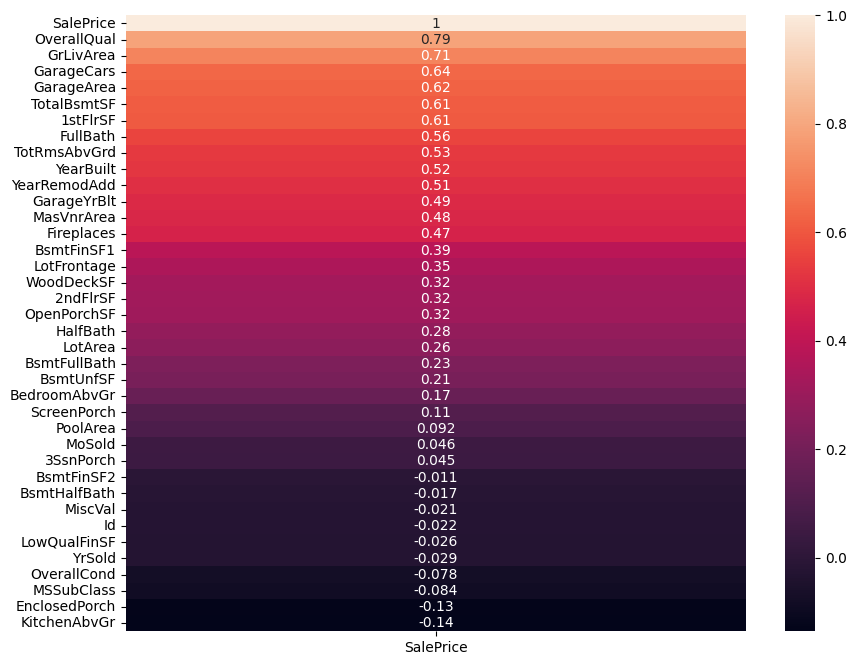

In [4]:
# Target distribution
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()

# Correlation heatmap (top features)
# Select only numerical columns for correlation calculation
corr = train_df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.show()

In [5]:
# Drop ID from coordinates
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)

# Combine train + test for consistent encoding
all_data = pd.concat([train_df.drop("SalePrice", axis=1), test_df], axis=0)

# Fill numeric missing with median
num_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy="median")
all_data[num_cols] = imputer.fit_transform(all_data[num_cols])

# One Hot Encode categorical
all_data = pd.get_dummies(all_data)

# Split back
X = all_data[:len(train_df)]
X_test_final = all_data[len(train_df):]
y = train_df["SalePrice"]


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

pred_val_rf = rf_model.predict(X_val)

rmse_rf = np.sqrt(mean_squared_log_error(y_val, pred_val_rf))
mae_rf = mean_absolute_error(y_val, pred_val_rf)

print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - MAE:", mae_rf)


Random Forest - RMSE: 0.15269217137389127
Random Forest - MAE: 17412.47821917808


In [8]:
xgb_model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

pred_val_xgb = xgb_model.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_log_error(y_val, pred_val_xgb))
mae_xgb = mean_absolute_error(y_val, pred_val_xgb)

print("XGBoost - RMSE:", rmse_xgb)
print("XGBoost - MAE:", mae_xgb)


XGBoost - RMSE: 0.13321747464834152
XGBoost - MAE: 15124.0458984375
